<a href="https://colab.research.google.com/github/Compiler0110/Blockchain-implementation-/blob/main/Analyzing_Crime_Data_in_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction

Crime data analysis is a critical task for law enforcement agencies, policymakers, and communities aiming to enhance public safety. Los Angeles, as one of the most populous and diverse cities in the United States, faces unique challenges and opportunities related to crime prevention and response. This documentation presents an in-depth analysis of crime data in Los Angeles, aiming to provide valuable insights and actionable information to better understand and address criminal activities within the city.

#The Challenge

my goal in this analysis is to leverage data-driven insights to address critical questions and concerns related to crime in Los Angeles. i will explore various aspects of this dataset, such as the geographical distribution of crimes, the influence of time and location, the types of crimes committed, and the characteristics of the victims. my analysis extends to building predictive models that can help anticipate future criminal activities, a vital asset for law enforcement and community safety.

#Data Source

The foundation of this analysis lies in a comprehensive dataset containing detailed records of criminal incidents. This dataset, sourced from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8, offers an extensive collection of information regarding criminal activities in Los Angeles. With an emphasis on data quality and integrity, we conducted thorough data preprocessing to ensure its suitability for analysis.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report
import folium
from prophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.arima.model as sm



In [27]:
crimes = pd.read_csv('crimes.csv')
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


In [28]:
male_crimes = crimes[crimes['Vict Sex']=='M']
Number_of_males = male_crimes.shape[0]
Number_of_males

168308

In [29]:
Female_crimes = crimes[crimes['Vict Sex']=='F']
Number_of_Female = Female_crimes.shape[0]
Number_of_Female

143018

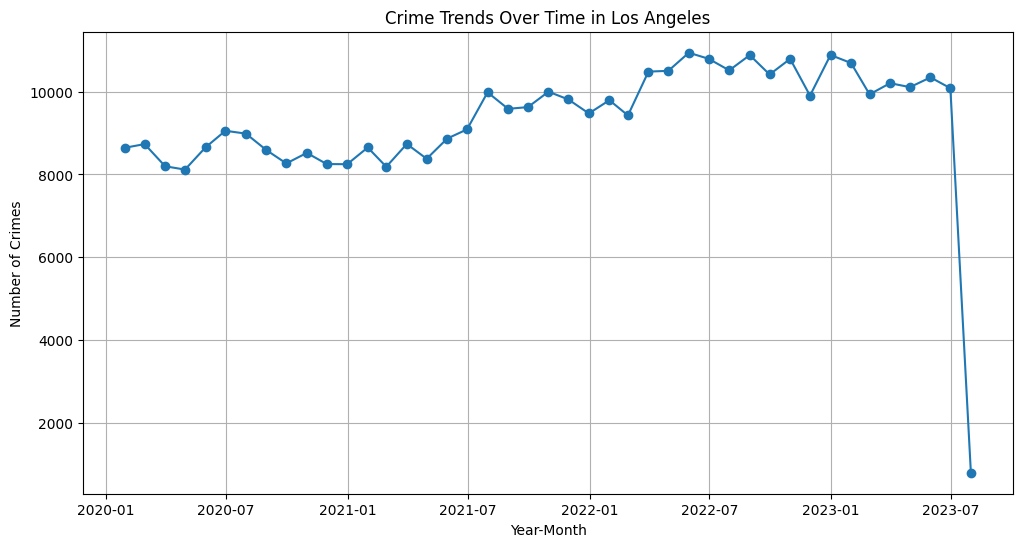

In [30]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'],format='%Y-%m-%d')
crimes_counts = crimes.groupby('Date Rptd').size().reset_index(name='Count')
crimes_counts.set_index('Date Rptd',inplace=True)
crime_counts_resampled = crimes_counts['Count'].resample('M').sum()


plt.figure(figsize=(12, 6))
plt.plot(crime_counts_resampled.index, crime_counts_resampled.values, marker='o', linestyle='-')
plt.title('Crime Trends Over Time in Los Angeles')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

In [31]:
crime_by_area = crimes['AREA NAME'].value_counts().reset_index()
crime_by_area

,index,AREA NAME
0,Central,26996
1,77th Street,25147
2,Pacific,23267
3,Southwest,22284
4,Hollywood,21373
5,Southeast,20596
6,Olympic,20298
7,Newton,19966
8,N Hollywood,19924
9,Wilshire,18813


In [32]:
crime_by_area.columns = ['AREA NAME','NUMBER OF CRIMES']
crime_by_area

,AREA NAME,NUMBER OF CRIMES
0,Central,26996
1,77th Street,25147
2,Pacific,23267
3,Southwest,22284
4,Hollywood,21373
5,Southeast,20596
6,Olympic,20298
7,Newton,19966
8,N Hollywood,19924
9,Wilshire,18813


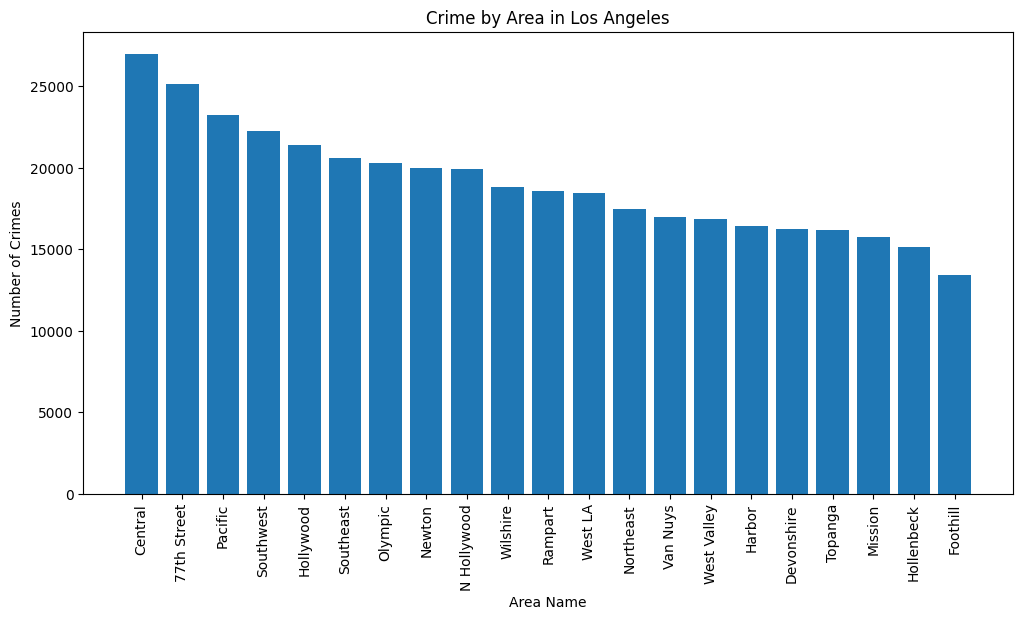

In [33]:
crime_by_area = crime_by_area.sort_values(by="NUMBER OF CRIMES",ascending = False)
plt.figure(figsize=(12,6))
plt.bar(crime_by_area['AREA NAME'],crime_by_area['NUMBER OF CRIMES'])
plt.xticks(rotation=90)
plt.title('Crime by Area in Los Angeles')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.show()

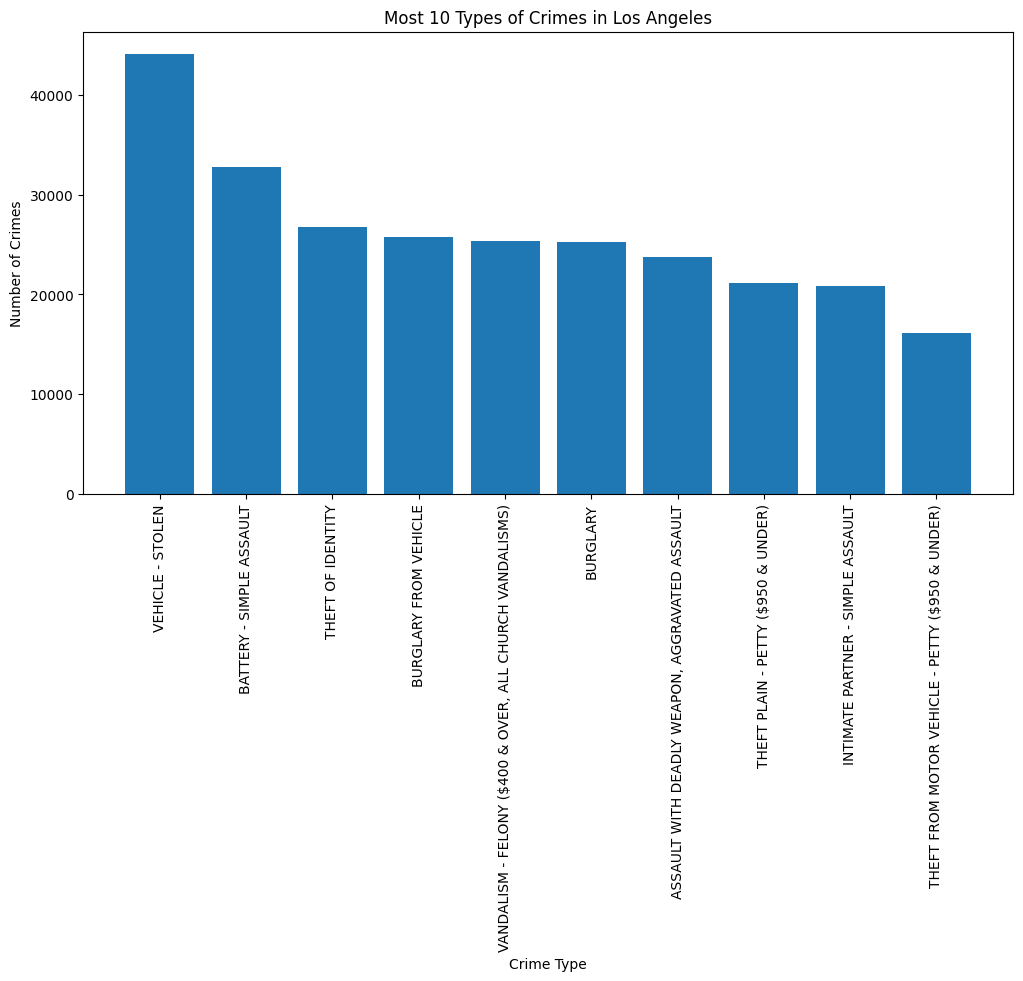

In [34]:
crime_type = crimes['Crm Cd Desc'].value_counts().reset_index()
crime_type
crime_type.columns = ['CRIME TYPE', 'NUMBER OF CRIMES']
crime_type.sort_values(by="NUMBER OF CRIMES",ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(crime_type['CRIME TYPE'][:10], crime_type['NUMBER OF CRIMES'][:10])
plt.xticks(rotation=90)
plt.title('Most 10 Types of Crimes in Los Angeles')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

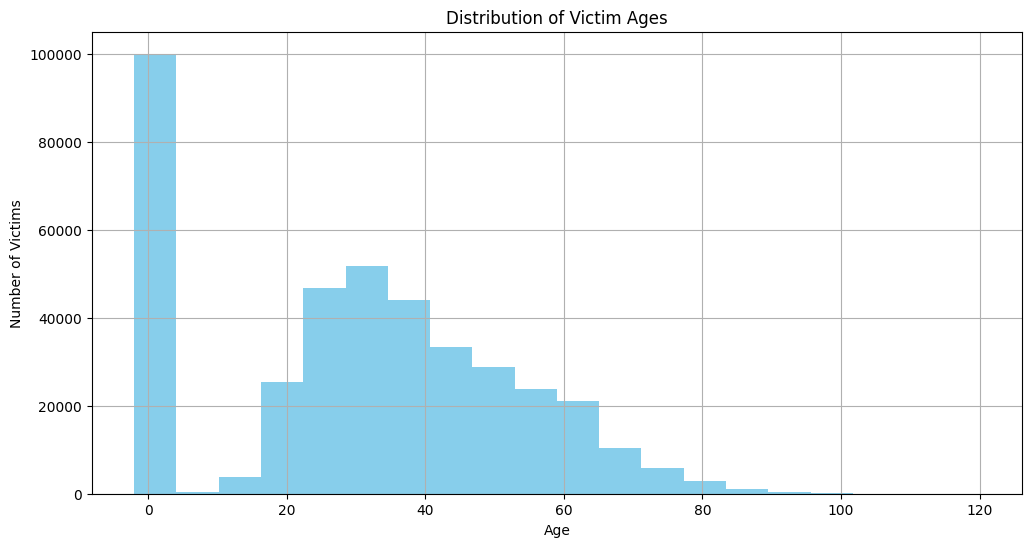

***************************************************************************************


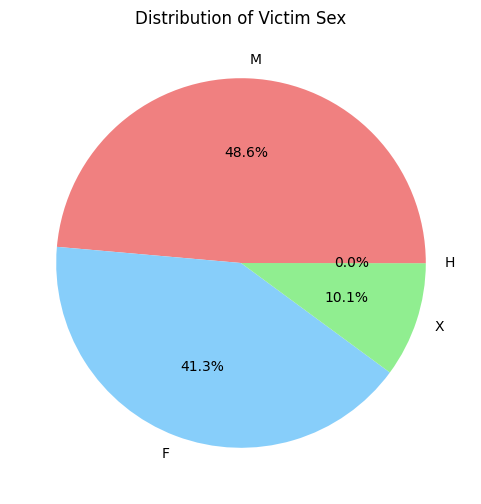

***************************************************************************************


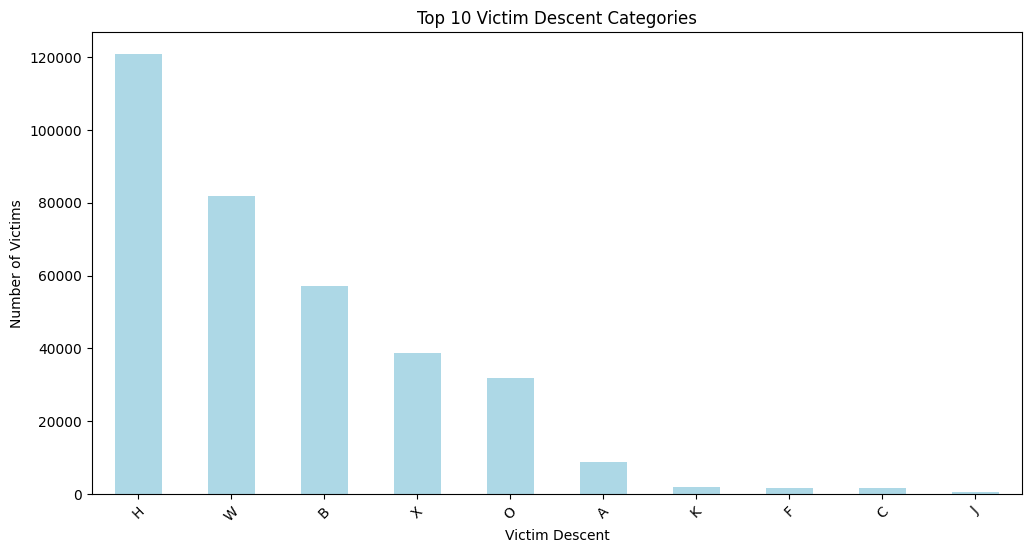

In [35]:

plt.figure(figsize=(12, 6))
plt.hist(crimes['Vict Age'].dropna(), bins=20, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()
print("***************************************************************************************")
plt.figure(figsize=(6, 6))
sex_counts = crimes['Vict Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Victim Sex')
plt.show()
print("***************************************************************************************")
plt.figure(figsize=(12, 6))
descent_counts = crimes['Vict Descent'].value_counts()
descent_counts = descent_counts.head(10)
descent_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Victim Descent Categories')
plt.xlabel('Victim Descent')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.show()

In [36]:
weapon_used = crimes['Weapon Desc'].value_counts().reset_index()
weapon_used

,index,Weapon Desc
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",70535
1,UNKNOWN WEAPON/OTHER WEAPON,14667
2,VERBAL THREAT,10382
3,HAND GUN,8834
4,SEMI-AUTOMATIC PISTOL,3243
...,...,...
72,UZI SEMIAUTOMATIC ASSAULT RIFLE,3
73,ANTIQUE FIREARM,3
74,MAC-11 SEMIAUTOMATIC ASSAULT WEAPON,2
75,MAC-10 SEMIAUTOMATIC ASSAULT WEAPON,2


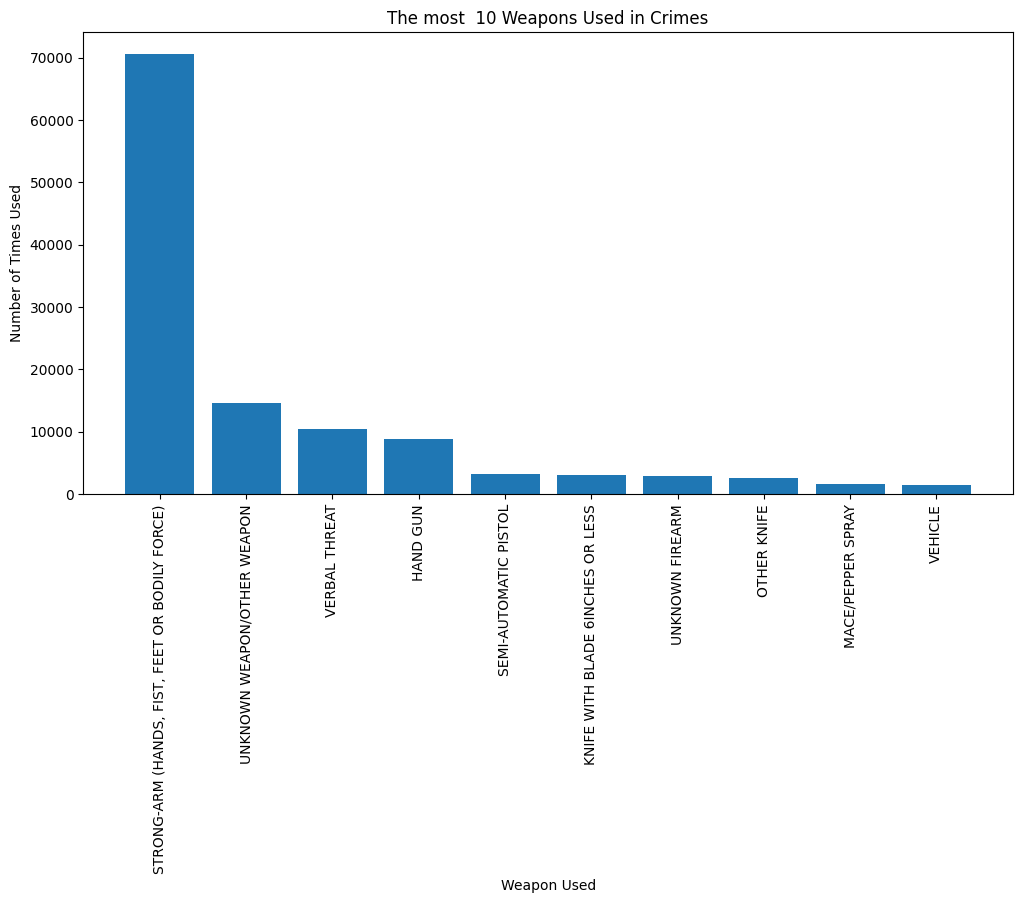

In [37]:
weapon_used.columns = ['WEAPON NAME','NUMBER OF CRIMES USING THIS WEAPON']
weapon_used.sort_values(by='NUMBER OF CRIMES USING THIS WEAPON',ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(weapon_used['WEAPON NAME'][:10], weapon_used['NUMBER OF CRIMES USING THIS WEAPON'][:10])
plt.xticks(rotation=90)
plt.title('The most  10 Weapons Used in Crimes')
plt.xlabel('Weapon Used')
plt.ylabel('Number of Times Used')
plt.show()

In [38]:
subset_size  =2000
subset = crimes.sample(n=subset_size , random_state = 42)

crime_map = folium.Map(location =[34.0522, -118.2437], zoom_start=11)

for index , row in subset.iterrows():
  lat,lon  = row['LAT'],row['LON']
  crime_type = row['Crm Cd Desc']
  folium.Marker([lat,lon],popup = crime_type).add_to(crime_map)

crime_map

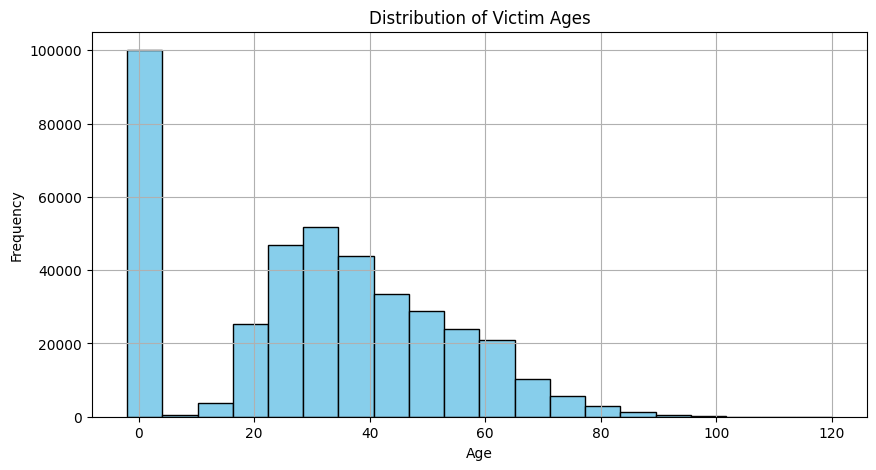

Summary Statistics of Victim Age:
count    400146.000000
mean         30.134356
std          21.856693
min          -2.000000
25%           4.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

Count of Victims by Sex:
M    168308
F    143018
X     34894
H        51
Name: Vict Sex, dtype: int64

Count of Victims by Descent:
H    120776
W     81923
B     56999
X     38735
O     31795
A      8797
K      2083
F      1659
C      1547
J       609
V       438
I       384
Z       222
P       121
U        90
L        26
D        24
G        20
S        19
-         1
Name: Vict Descent, dtype: int64


In [39]:
victim_data = crimes[['Vict Age', 'Vict Sex', 'Vict Descent']]


victim_age_stats = victim_data['Vict Age'].describe()

victim_sex_counts = victim_data['Vict Sex'].value_counts()

victim_descent_counts = victim_data['Vict Descent'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(victim_data['Vict Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Summary Statistics of Victim Age:")
print(victim_age_stats)
print("\nCount of Victims by Sex:")
print(victim_sex_counts)
print("\nCount of Victims by Descent:")
print(victim_descent_counts)


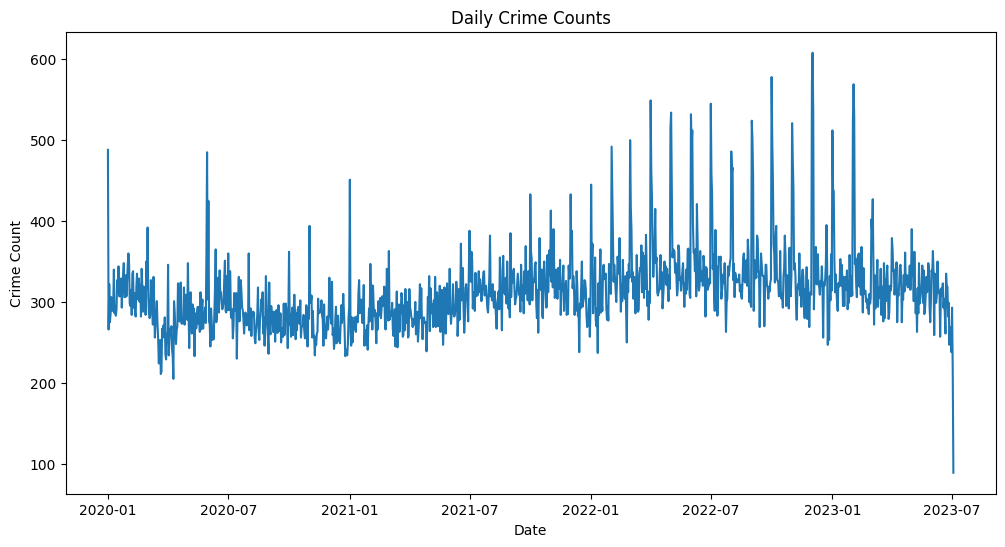

ADF Statistic: -3.3929155289104735
p-value: 0.011202764652548538
Critical Values: {'1%': -3.435554672689999, '5%': -2.863838402102491, '10%': -2.5679936943096284}
The time series is stationary.
ADF Statistic: -3.3929155289104735
p-value: 0.011202764652548538
Critical Values: {'1%': -3.435554672689999, '5%': -2.863838402102491, '10%': -2.5679936943096284}
The time series is stationary.
ADF Statistic: -12.98660703754623
p-value: 2.8695772710412025e-24
Critical Values: {'1%': -3.435554672689999, '5%': -2.863838402102491, '10%': -2.5679936943096284}
The time series is stationary.
                               SARIMAX Results                                
Dep. Variable:                  DR_NO   No. Observations:                 1279
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6596.683
Date:                Thu, 12 Oct 2023   AIC                          13199.366
Time:                        17:38:16   BIC                          13214.825
Sample:               

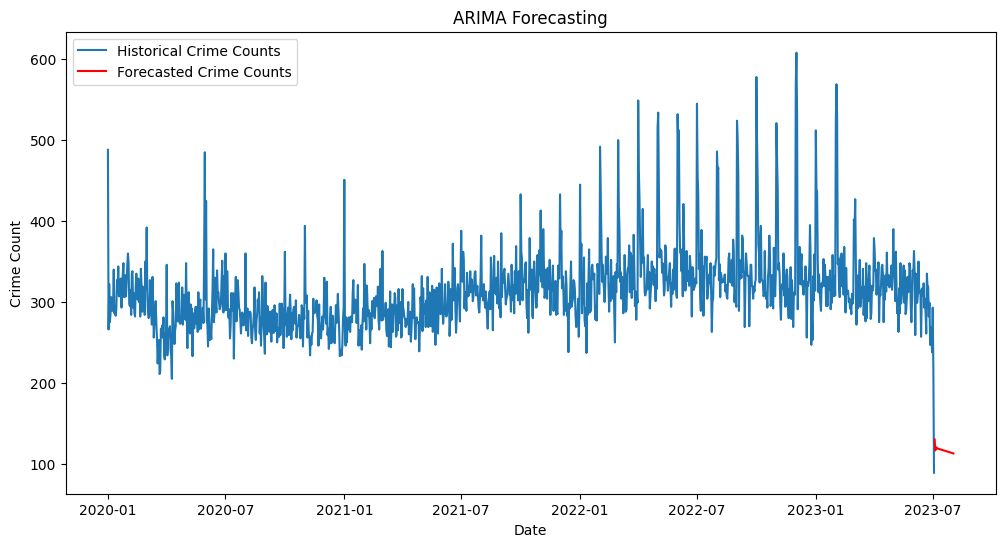

In [40]:



crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes.set_index('DATE OCC', inplace=True)

daily_crime_counts = crimes['DR_NO'].resample('D').count()
daily_crime_counts = daily_crime_counts.fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts)
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.show()

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

check_stationarity(daily_crime_counts)

if not check_stationarity(daily_crime_counts):
    differenced_series = daily_crime_counts.diff().dropna()
    check_stationarity(differenced_series)
else:
    differenced_series = daily_crime_counts


p, d, q = 1, 1, 1
model = sm.ARIMA(differenced_series, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())


n_forecast = 30
forecast_values = model_fit.forecast(steps=n_forecast)


forecast_start_date = differenced_series.index[-1] + pd.DateOffset(days=1)
forecast_end_date = differenced_series.index[-1] + pd.DateOffset(days=n_forecast)
forecast_index = pd.date_range(forecast_start_date, forecast_end_date)

forecast_data = pd.Series(forecast_values, index=forecast_index)

def invert_differencing(differenced_series, forecast):
    forecast_cumsum = forecast.cumsum()
    last_observation = differenced_series.iloc[-1]
    forecast_original = last_observation + forecast_cumsum
    return forecast_original

forecast_original = invert_differencing(daily_crime_counts, forecast_data)

plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts, label='Historical Crime Counts')
plt.plot(forecast_original, color='red', label='Forecasted Crime Counts')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()
